In [1]:
import os, os.path
import glob
import pickle
import numpy
from numpy.polynomial import Polynomial
from scipy import ndimage, signal, interpolate
#import matplotlib
#matplotlib.use('PDF')
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from galpy.util import bovy_conversion, save_pickles, bovy_coords, bovy_plot
import pal5_util
from gd1_util import R0, V0
import custom_stripping_df
import seaborn as sns
import astropy.units as u
from galpy import potential
%pylab inline
from matplotlib import cm, pyplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
dir1 = '/home/nil/Dropbox/streamgap-pepper/sampled_Dehnenbar/'
allfilenames= glob.glob(dir1 + '*.dat')

xiall=[]

for ii in range(len(allfilenames)):
        xiall.append(numpy.loadtxt(allfilenames[ii])[:,0])
        
xialll = [item for sublist in xiall for item in sublist]



In [3]:
print len(xialll)

994000


141.0


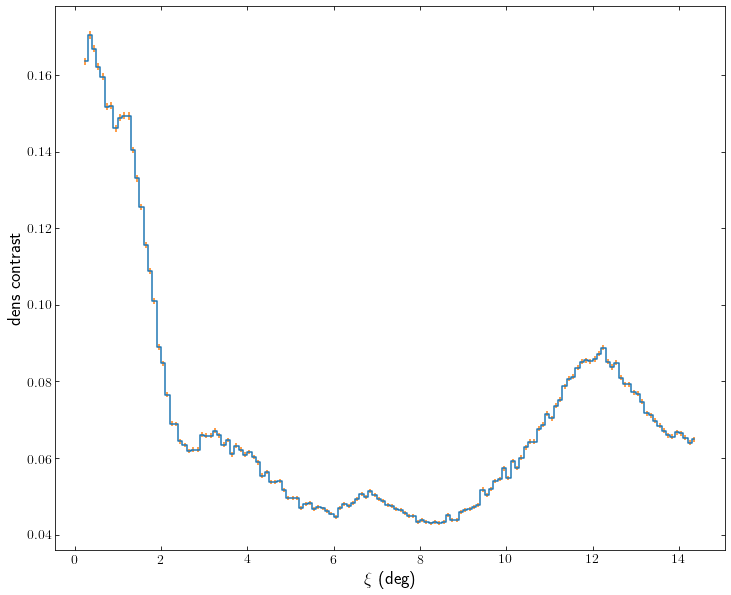

In [9]:
N=len(xialll)
minxi = 0.25
maxxi= 14.35
bw= 0.1

nbins= (maxxi - minxi)/bw
print nbins

xibin_edge=[(minxi-0.5*bw) + i*bw for i in range(int(nbins)+2)]

#print xibin_edge

midxi=[0.5*(xibin_edge[i] + xibin_edge[i+1]) for i in range(int(nbins)+1)]
#print len(midxi)

nden=np.histogram(xialll,xibin_edge,density=True)[0]
Ndn=np.histogram(xialll,xibin_edge)[0]

shot_noise=numpy.sqrt(Ndn)

err=shot_noise/(N*bw)


bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(12,10.)
xrange=[0.,14.5]
#hist(xi,xibin_edge,normed=True)
plot(midxi,nden,ls='steps-mid')
errorbar(midxi,nden,err,marker='None',ls='None')
xlabel(r'$\xi$ (deg)')
ylabel('dens contrast')

In [10]:
#write the mean density

fo=open(dir1 + 'density_994000samples_Dehnenbar.dat','w')
fo.write("#xi    den_contrast    shot_noise" + '\n')

for j in range(len(nden)):
    fo.write(str(midxi[j]) + "   " + str(nden[j]) + "   " + str(err[j]) + "\n")
    
fo.close()

In [20]:
def compute_Pk(filename, scaling = 'spectrum'):
    data= numpy.loadtxt(filename)
    p1=data[:,0]
    tdata=data[:,1]
    data_err=data[:,2]
    
    px,py= signal.csd(tdata,tdata,fs=1./(p1[1]-p1[0]),scaling=scaling,nperseg=len(p1))
    py= py.real
    px= 1./px
    py= numpy.sqrt(py*(p1[-1]-p1[0]))
    
            
    # Perform simulations of the noise to determine the power in the noise
    nerrsim= 10000
    ppy_err= numpy.empty((nerrsim,len(px)))
    for ii in range(nerrsim):
        tmock= data_err*numpy.random.normal(size=len(p1))
        ppy_err[ii]= signal.csd(tmock,tmock,
                                fs=1./(p1[1]-p1[0]),scaling=scaling,
                                nperseg=len(p1))[1].real
    py_err= numpy.sqrt(numpy.median(ppy_err,axis=0)*(p1[-1]-p1[0]))
    
    #return 180./px/numpy.pi, py, py_err #if apars
    return px, py, py_err




def set_ranges_and_labels_dens():
    bovy_plot.bovy_text(r'$\sqrt{\delta\delta}$',top_left=True,size=18.)
    xlabel(r'$1/k_{\xi}\,(\mathrm{deg})$',size=18)
    ylim(0.001,10.)
    xlim(1.,150.)
    for axis in [gca().xaxis,gca().yaxis]:
        axis.set_major_formatter(FuncFormatter(
                lambda y,pos: (r'${{:.{:1d}f}}$'.format(int(numpy.maximum(-numpy.log10(y),0)))).format(y)))
    return None

/home/nil/.local/share/canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide



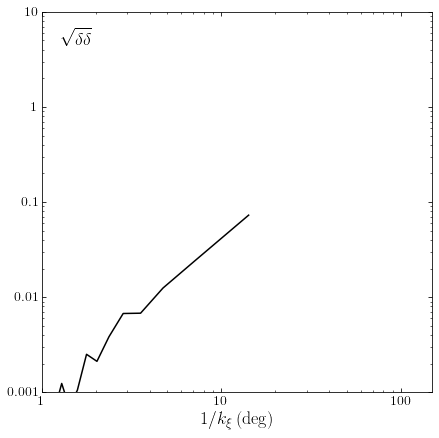

In [21]:
filename=dir1 + 'density_994000samples_Dehnenbar.dat'
px1,py1,pyerr1=compute_Pk(filename, scaling = 'spectrum')

bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(7,7)


loglog(px1,py1,color='k',zorder=1,)
loglog(px1,pyerr1,lw=2.,color='r',zorder=1,ls='--')
set_ranges_and_labels_dens()

